# Covid Cases by Country 2023
This dataset is taking from [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/covid-cases-by-country-2023). 

A short blurb taken from the source:
> Number of reported cases and deaths from the SARS-CoV-2 virus that causes Covid-19 for each country in the world. Includes Country, Total Cases, New Cases, Total Deaths, New Deatch, Total Recovered, New Recovered, Active Cases, Serious or Critical, Total Cases per 1 Million population, Deaths per 1 Million population, Total Tests, Tests per 1 Million population, and Population of the country. Data as of 6th of August 2023.

## Goal
The goal of this study is to visualize Covid Cases by Country. Mainly, I want to try to visualize using geopolitical data for practice, using `geopandas` library as the key tool. I  also wanted to practice dataframe merging. 

## Step 0: Exploring the Data Set
Let's first look at what the data set has to offer.

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

df = pd.read_csv('Data/WorldCases2023.csv')
print("# of Columns", df.shape[1])
print("# of Rows", df.shape[0])
print("Columns", df.columns)

df.head(10)


# of Columns 15
# of Rows 232
Columns Index(['Rank', 'Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical',
       'Tot CasesPer1MPop', 'DeathsPer1MPop', 'TotalTests', 'TestsPer1MPop ',
       'Population'],
      dtype='object')


,Rank,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot CasesPer1MPop,DeathsPer1MPop,TotalTests,TestsPer1MPop,Population
0,0,World,692616455,1655.0,6904586.0,6.0,664825894.0,51336.0,20885975.0,37175.0,88856.0,885.8,NaN,NaN,NaN
1,1,USA,107548847,1370.0,1170023.0,4.0,105679821.0,2021.0,699003.0,710.0,321228.0,3495.0,1.181184e+09,3527974.0,"334,805,269"
2,2,India,44995933,NaN,531918.0,NaN,44462462.0,NaN,1553.0,NaN,31988.0,378.0,9.307980e+08,661721.0,"1,406,631,776"
3,3,France,40138560,NaN,167642.0,NaN,39970918.0,NaN,0.0,869.0,612013.0,2556.0,2.714902e+08,4139547.0,"65,584,518"
4,4,Germany,38428685,NaN,174352.0,NaN,38240600.0,NaN,13733.0,NaN,458119.0,2078.0,1.223324e+08,1458359.0,"83,883,596"
5,5,Brazil,37728415,NaN,704794.0,NaN,36249161.0,NaN,774460.0,NaN,175193.0,3273.0,6.377617e+07,296146.0,"215,353,593"
6,6,Japan,33803572,NaN,74694.0,NaN,NaN,NaN,NaN,83.0,269169.0,595.0,1.004149e+08,799578.0,"125,584,838"
7,7,S. Korea,33201796,NaN,35313.0,NaN,32665182.0,47029.0,501301.0,174.0,646832.0,688.0,1.580406e+07,307892.0,"51,329,899"
8,8,Italy,25918253,NaN,191053.0,NaN,25612716.0,NaN,114484.0,28.0,430087.0,3170.0,2.743961e+08,4553327.0,"60,262,770"
9,9,UK,24651375,NaN,228429.0,NaN,24415197.0,426.0,7749.0,NaN,359885.0,3335.0,5.225265e+08,7628357.0,"68,497,907"


## Step 1: Data Cleaning and Wrangling
Looking at our data. We see that it is fairly complete. However, there are a lot of entries that are missing rows, represented by NaN. So let's populate them.

In [209]:
# Set all NaN entries to have zero values. There isn't enough data to set them tbe mean/median/mode etc values.
df.fillna(0, inplace=True)
df['Population'] = df['Population'].str.replace(',', '').astype(float)
df.iloc[:, 2:]= df.iloc[:, 2:].astype(float)

# Fill out World TotalTests, TestsPer1MPop, and Population
df.loc[0, 'TotalTests'] = df.loc[1:, 'TotalTests'].sum()
df.loc[0, 'Population'] = df.loc[1:, 'Population'].sum()

We also noticed that some Country names were either in a shortend format or incorrect, below, we show a method to correct them so they show the full names. We use the `geopandas` library and do a `LEFT_JOIN`.

In [210]:

# Fix some Country Names, USA-> United States of America
df.loc[df['Country'] == 'USA', 'Country'] = 'United States of America'
df.loc[df['Country'] == 'S. Korea', 'Country'] = 'South Korea'
df.loc[df['Country'] == 'S. Sudan', 'Country'] = 'South Sudan'
df.loc[df['Country'] == 'UK', 'Country'] = 'United Kingdom'
df.loc[df['Country'] == 'UAE', 'Country'] = 'United Arab Emirates'

# Use geopandas to find out mispelled
# Merge data with world map based on country names
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = df.merge(world, how='left', left_on='Country', right_on='name')
misspelled_countries = merged_data[merged_data['name'].isna()]['Country']
print(misspelled_countries, len(misspelled_countries))

del world
print('Total Tests', df.loc[1, 'TotalTests'])

df.head(5)

0                 World
31                 DPRK
41            Hong Kong
44            Singapore
79              Bahrain
             ...       
227    Diamond Princess
228             Tokelau
229        Vatican City
230      Western Sahara
231          MS Zaandam
Name: Country, Length: 75, dtype: object 75
Total Tests 1181184142.0


<ipython-input-210-584c0351a4cb>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,Rank,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot CasesPer1MPop,DeathsPer1MPop,TotalTests,TestsPer1MPop,Population
0,0,World,692616455.0,1655.0,6904586.0,6.0,664825894.0,51336.0,20885975.0,37175.0,88856.0,885.8,6.999161e+09,0.0,7.944935e+09
1,1,United States of America,107548847.0,1370.0,1170023.0,4.0,105679821.0,2021.0,699003.0,710.0,321228.0,3495.0,1.181184e+09,3527974.0,3.348053e+08
2,2,India,44995933.0,0.0,531918.0,0.0,44462462.0,0.0,1553.0,0.0,31988.0,378.0,9.307980e+08,661721.0,1.406632e+09
3,3,France,40138560.0,0.0,167642.0,0.0,39970918.0,0.0,0.0,869.0,612013.0,2556.0,2.714902e+08,4139547.0,6.558452e+07
4,4,Germany,38428685.0,0.0,174352.0,0.0,38240600.0,0.0,13733.0,0.0,458119.0,2078.0,1.223324e+08,1458359.0,8.388360e+07


# Step 2: Explanatory Data Analysis
Let's begin with some simple chart to visualize the data better.

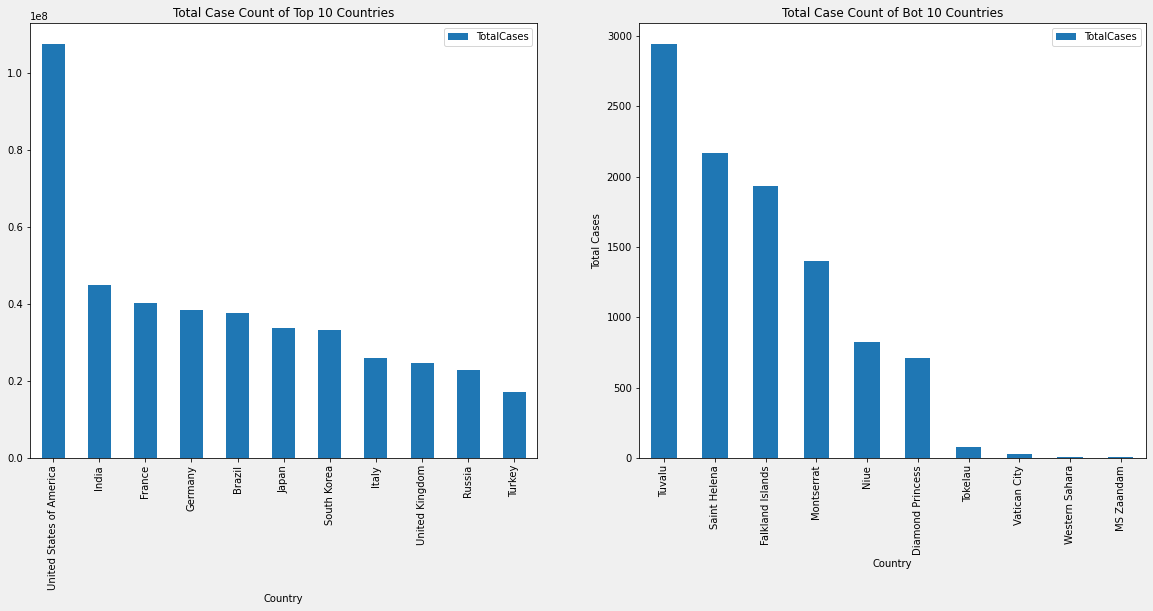

In [211]:
# Rank Cases
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

total_cases_top_10 = df[['Country', 'TotalCases']][1:12]
total_cases_bot_10 = df[['Country', 'TotalCases']][-10:]
total_cases_top_10.plot(kind='bar', x='Country', y='TotalCases', title='Total Case Count of Top 10 Countries', 
                 ax=axes[0])
total_cases_bot_10.plot(kind='bar', x='Country', y='TotalCases', title='Total Case Count of Bot 10 Countries',
                 ax=axes[1])


fig.set_facecolor('#f0f0f0') 
plt.ylabel('Total Cases')
plt.show()


<ipython-input-212-9fa64154d1f2>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-212-9fa64154d1f2>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data[column]):


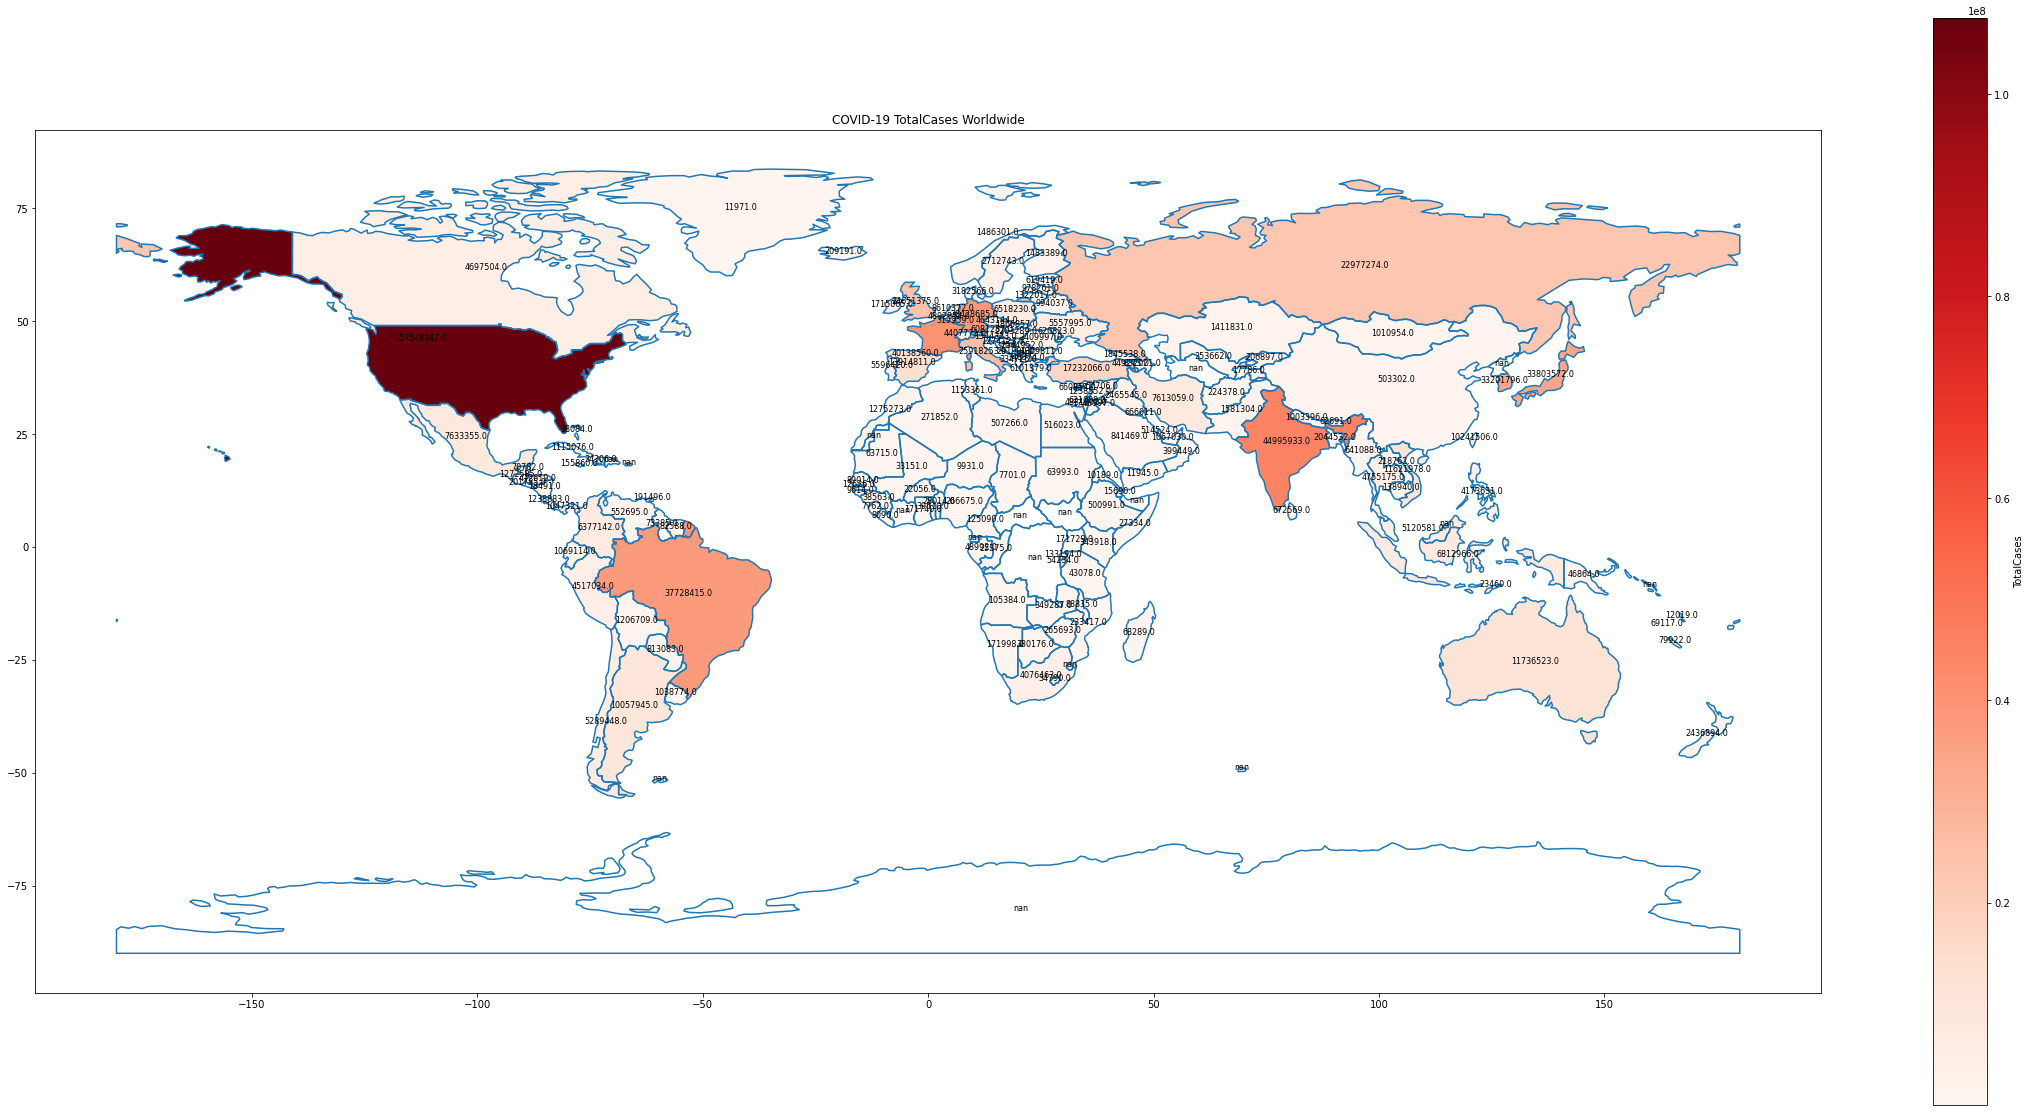

In [212]:
def plot_covid_world_map(df, column):
    # Load world map data (GeoJSON format)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge world map data with your DataFrame on country names
    merged_data = world.merge(df, how='left', left_on='name', right_on='Country')
    
    # Plot the world map
    fig, ax = plt.subplots(1, 1, figsize=(40, 20))
    world.boundary.plot(ax=ax)
    merged_data.plot(ax=ax, column=column, cmap='Reds', legend=True, legend_kwds={'label': column})

    # Annotate each country with total COVID-19 cases
    for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data[column]):
        ax.text(x, y, label, fontsize=8, ha='center')

    ax.set_title('COVID-19 {} Worldwide'.format(column))
    plt.show()
    
plot_covid_world_map(df, 'TotalCases')


This map allows us to visualize the severity of covid in each country. **However**, notice that some countries are showing up as 'nan'. This is largely due to the data set not having correct names, and thus the `LEFT JOIN` with the `geopandas` dataset won't merge rows in which our dataset has incorrect country name or incorrect country name format. Thus, to improve this dataset, the names would have to be standardized for more complete graphing.

However, this method can be extended to graph the other properties as well. For example, lets plot `Active Cases`

<ipython-input-212-9fa64154d1f2>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-212-9fa64154d1f2>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data[column]):


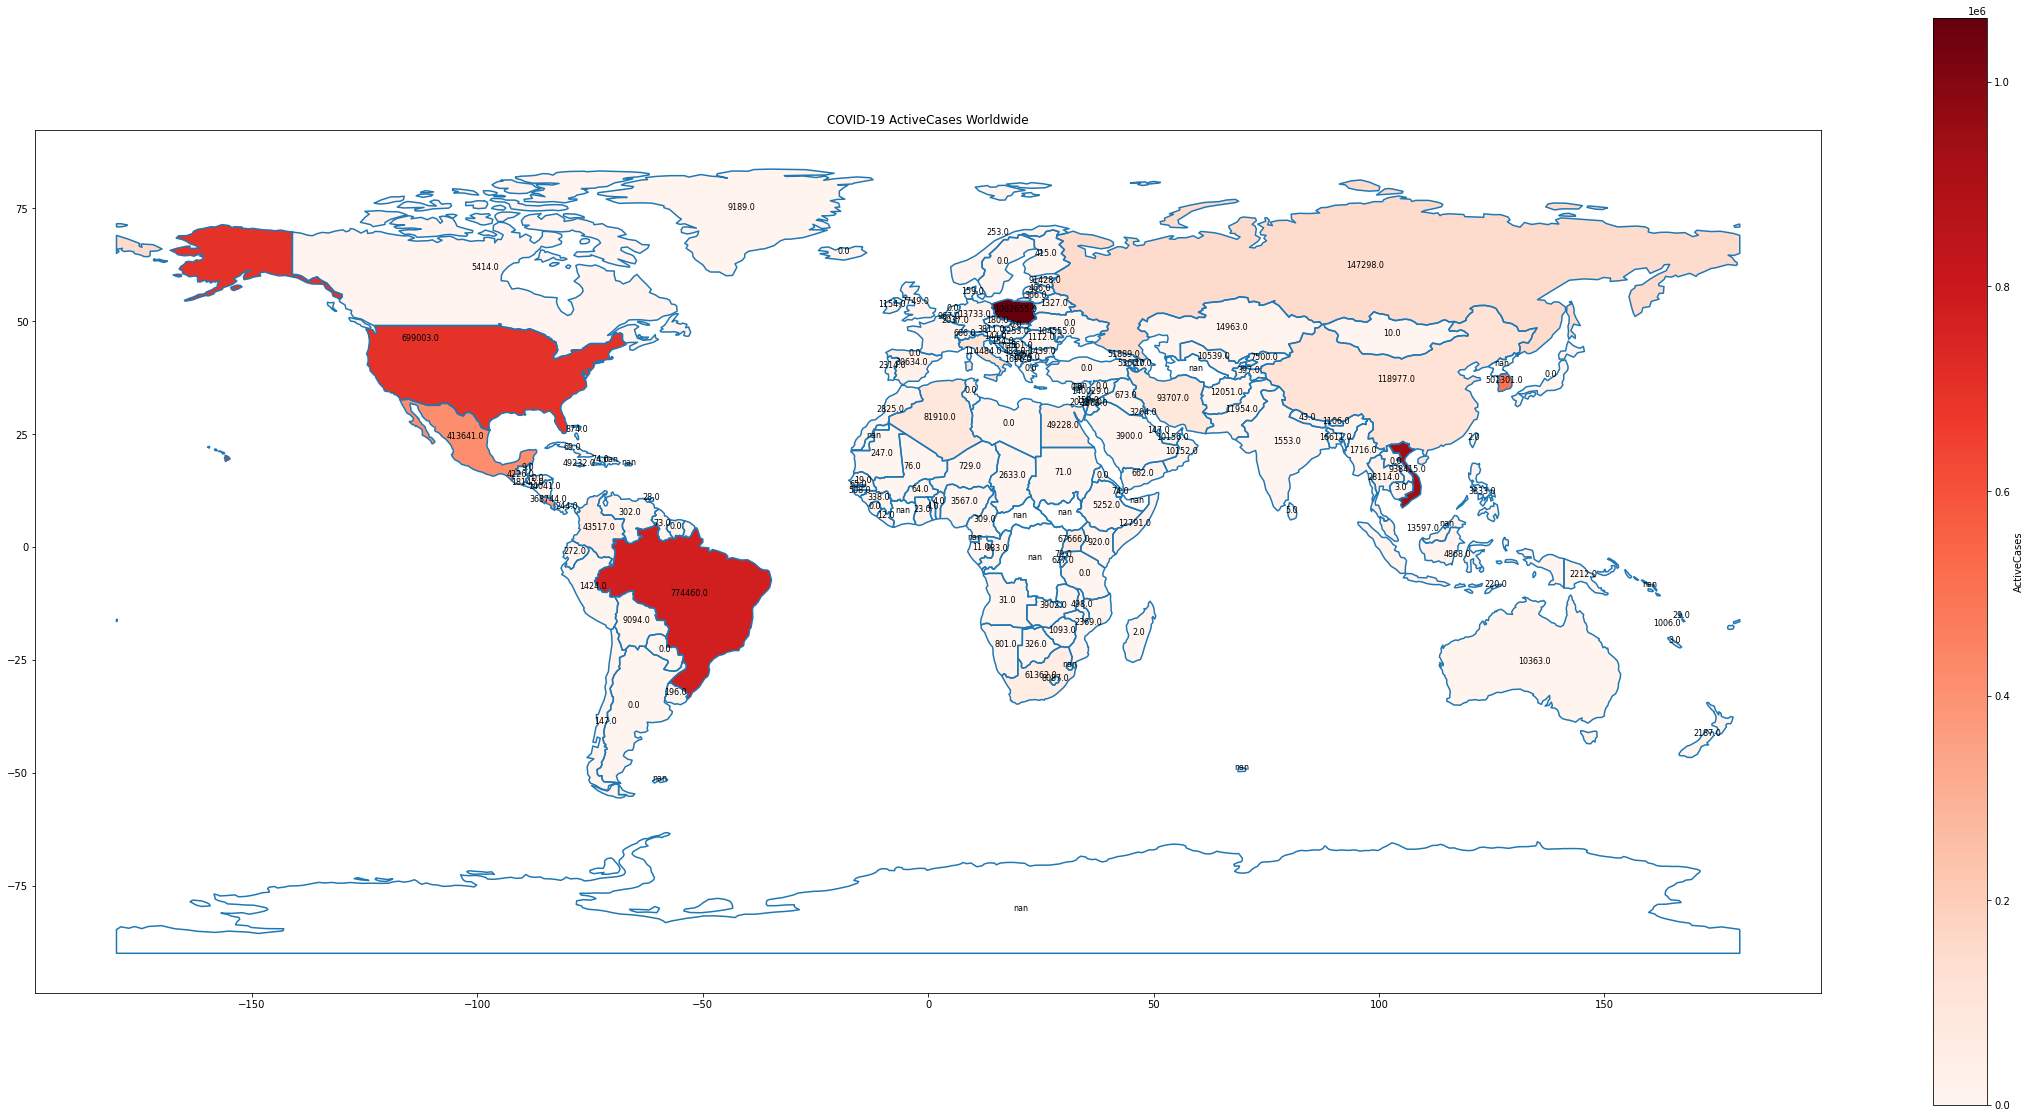

In [213]:
plot_covid_world_map(df, 'ActiveCases')

We can also use this geo data to graph total cases by region/continent.


<ipython-input-214-ce98232b24b8>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


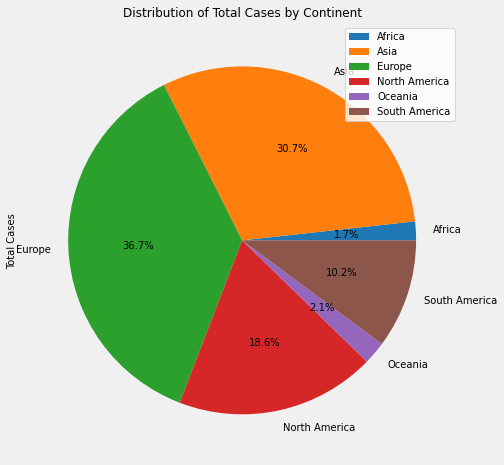

In [214]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = df[1:].merge(world, how='left', left_on='Country', right_on='name')
by_region = merged_data.groupby(by='continent').sum().reset_index().set_index('continent')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
by_region.plot(kind='pie', x='continent', y='TotalCases', ylabel='continent', autopct='%1.1f%%', ax=axes)


fig.set_facecolor('#f0f0f0') 
plt.ylabel('Total Cases')
plt.title('Distribution of Total Cases by Continent')
plt.show()
del world

Let's also use some bar plots to visualize these different categories.

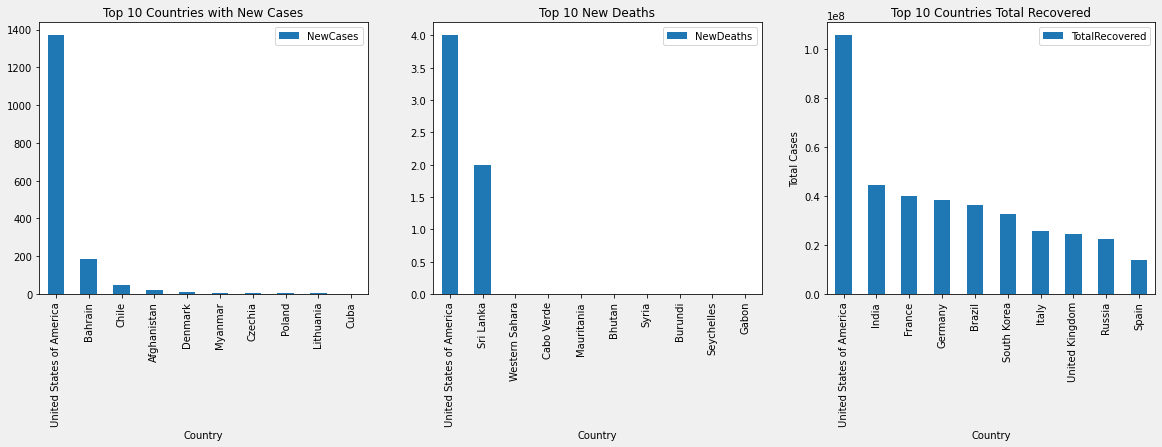

In [215]:
# Rank NewCases, TotalDeaths, NewDeaths, TotalRecovered
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

newcases = df[['Country', 'NewCases']].sort_values(by='NewCases', ascending=False)[1:11]
newdeaths = df[['Country', 'NewDeaths']].sort_values(by='NewDeaths', ascending=False)[1:11]
totalrecovered = df[['Country', 'TotalRecovered']].sort_values(by='TotalRecovered', ascending=False)[1:11]

newcases.plot(kind='bar', x='Country', y='NewCases', title='Top 10 Countries with New Cases', ax=axes[0])
newdeaths.plot(kind='bar', x='Country', y='NewDeaths', title='Top 10 New Deaths', ax=axes[1])
totalrecovered.plot(kind='bar', x='Country', y='TotalRecovered', title='Top 10 Countries Total Recovered', ax=axes[2])

fig.set_facecolor('#f0f0f0') 
plt.ylabel('Total Cases')
plt.show()

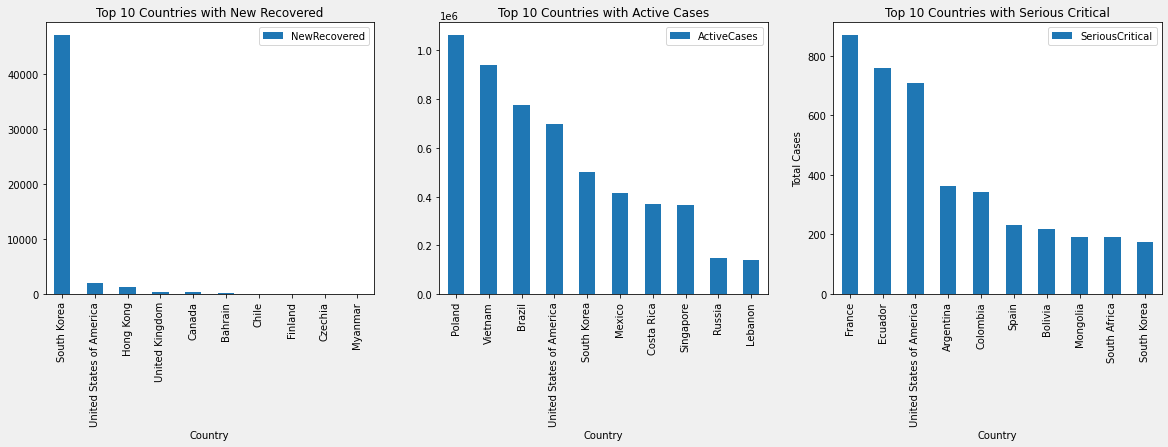

In [216]:
# Rank NewRecovered, ActiveCases, SeriousCritical
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

newrecovered = df[['Country', 'NewRecovered']].sort_values(by='NewRecovered', ascending=False)[1:11]
activecases = df[['Country', 'ActiveCases']].sort_values(by='ActiveCases', ascending=False)[1:11]
seriouscritical = df[['Country', 'SeriousCritical']].sort_values(by='SeriousCritical', ascending=False)[1:11]

newrecovered.plot(kind='bar', x='Country', y='NewRecovered', title='Top 10 Countries with New Recovered', ax=axes[0])
activecases.plot(kind='bar', x='Country', y='ActiveCases', title='Top 10 Countries with Active Cases', ax=axes[1])
seriouscritical.plot(kind='bar', x='Country', y='SeriousCritical', title='Top 10 Countries with Serious Critical', ax=axes[2])

fig.set_facecolor('#f0f0f0') 
plt.ylabel('Total Cases')
plt.show()

Assuming the data set is complete, we can make a few observations just from the bar chart.
- USA has the most amount of new cases by a large margin. This may have to do with American policies and American attitude towards COVID.
- South Korea is handling COVID cases extremely well recently, with the most of amount of newly recovered.
- Even with a smaller population, France and Equador have more cases that are serious critical than America. 
- Countries like Poland, Vietnam, and Brazil have more active cases.

## Step 3: Conclusion
This was a basic look at the data set. I wanted to most explore how to obtain geo data using `geopandas` to visualize datasets. Based on analyzing the dataset, I believe this dataset is far from complete, and in order to use it, it must be continously updated. 

Thanks for reading! Leave any suggestions or tips.